# Konza Prairie: A Correlative Precipitation and Vegetation Health Analysis

## Introduction

### Background on Konza Prairie Biological Station
Konza Prairie Biological Station is a 3,487 hectare native tallgrass prairie preserve south of Manhattan, KS that is jointly owned by the Nature Conservancy and Kansas State University. The land was home to named and unnamed Indigenous peoples for thousands of years, including the Kaw people who were forcfully removed from the area sometime between 1846 and 1872 (*Konza Prairie*, n.d.), corresponding loosely with the initial settlement of Manhattan in 1855 (*Explore Manhattan*, 2025). Konza Prairie Biological Station has been operated as a field research station since 1971 by the KSU Biology department, who has employed goals of both long-term ecological research and prairie conservation. The vast majority of the prairie has never been plowed and retains its native characteristics (*Konza Prairie*, n.d.).

### Motivation
This project is motivated by climate change. Despite efforts taken to conserve the natural ecological processes of Konza Prairie, they will be indirectly altered by global human-driven effects of climate change. However, predicting specific future effects of anthropogenic climate change on the Prairie is beyond the scope of this project. Instead, it aims to better understand the relationship between precipitation and vegetation health, and more specifically, the extent to which precipitation limits vegetation health in the Prairie, a key linkage between climate, ecology, and overall ecosystem productivity (Fay et al., 2011; Craine et al., 2011). In Kansas, yearly precipitation is predicted to lessen with climate change, creating a drier environment (EPA, 2016). Konza Prairie Biological Station was chosen as a study site because it exhibits mostly homogenous vegetation structure in the form of grassland, where natural rainfall is a primary control of vegetation productivity amongst a lack of irrigation. A vegetation health-precipitation linkage should therefore be more strongly correlated than at most other sites on both a seasonal and interannual scale. Past research suggests that decreases in precipitation "could reduce productivity not only by reducing water availability but by also removing species that inhabit the most productive areas and respond the most to climate variability," but also that "climate change is unlikely to unilaterally alter the functional composition of the tallgrass prairie flora, as many functional traits such as physiological drought tolerance and maximum photosynthetic rates showed little relationship with climate envelope parameters" (Craine et al., 2011). 

### Objectives

For a time period of 2004-2012, this python-based project analyzes the relationship between yearly precipitation totals and vegetation health to discover just how much changes in precipitation effect Prairie productivity. It aims to determine how NDVI values change from 2004-2012, how precipitation values change from 2004-2012, and whether these changes correlate with each other. An additional, seasonal analysis was considered but ultimately excluded from this project due to potential consequences of snow cover limiting NDVI accuracy.

#### Research Question

The primary research question for this project, therefore, is: in Konza Prairie Biological Station, does change in yearly precipitation totals over a specific time period correlate with change in vegetation health over this time period?

## Methods
This analysis uses python code in GitHub Codespaces to produce Prairie precipitation and normalized difference vegetation index (NDVI) figures. NDVI values measure vegetation greenness as an indictor of vegetation health and range from -1 to 1, with low values indicating non-vegetated areas or unhealthy vegetation and high values indicating healthy vegetation (*Normalized Difference Vegetation Index*, 2024). 

### Data
Climate data was taken by the NOAA National Centers for Environmental Information (NCEI), and more specifically at station USW00053974 south of Manhattan, KS. This data was collected daily at this land-based station since 2004 (Menne et al., 2025). Precipitation data was specifically extracted and summed within this analysis to represent total precipitation values for each year between 2004 and 2024. This analysis has a start date of 2004 because this is when precipitation data collection at this station began.
NDVI data was extracted from MODIS vegetation indices (MOD13Q1) from NASA Earthdata using AppEEARS to request extraction (Didan, 2021). NDVI data from 2004-2024 was intended to be downloaded to match the entire precipitation dataset and analyze potential relationships on a 20-year scale. For ease of download amongst initial issues, 06/01-07/30 NDVI data from 2004-2012 was eventually downloaded, limiting the end date of this correlative analysis to 2012. A Konza Prairie Biological Station boundary polygon was also downloaded from Open Street Map (OpenStreetMap contributors, 2025). 

The above data was used in a series of python code cells to produce the analysis as follows:

### Precipitation Analysis

In [1]:
# Load libraries
# Advanced options on matplotlib/seaborn/pandas plots
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
# Common statistical plots for tabular data
import seaborn as sns
# Fit an OLS linear regression
from sklearn.linear_model import LinearRegression

import earthpy

### vector data
import geopandas as gpd
import pandas as pd

### raster data
import rioxarray as rxr
import xarray as xr

### maps and plots
import holoviews as hv
import hvplot.pandas
import hvplot.xarray

### open street map
from osmnx import features as osm
import osmnx as ox

### file structure
import os
import pathlib

### earthpy
import earthpy
import earthpy.api.appeears as eaapp

In [2]:
# Download data notebook
Konza_url = (
    'https://www.ncei.noaa.gov/access/services/data/v1'
    '?dataset=daily-summaries'
    '&dataTypes=PRCP'
    '&stations=USW00053974'
    '&startDate=2004-01-01'
    '&endDate=2024-12-31'
    '&units=standard')
Konza_url

'https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&dataTypes=PRCP&stations=USW00053974&startDate=2004-01-01&endDate=2024-12-31&units=standard'

In [3]:
# Download the climate data
Konza_climate_df = pd.read_csv(
    Konza_url,
    index_col='DATE',
    parse_dates=True,
    na_values=['NaN']
)

# Check that the download worked
Konza_climate_df.head()

,STATION,PRCP
DATE,,
2004-01-01,USW00053974,0.00
2004-01-02,USW00053974,0.00
2004-01-03,USW00053974,0.00
2004-01-04,USW00053974,0.03
2004-01-05,USW00053974,0.00


<Axes: title={'center': 'Precipitation at Konza Prairie Biological Station, KS'}, xlabel='Year', ylabel='Precipitation (in)'>

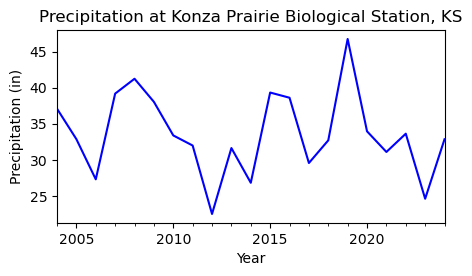

In [4]:
# Plot precipitation over time
Konza_precip0 = Konza_climate_df.PRCP.resample('YS').sum().plot(
    title='Precipitation at Konza Prairie Biological Station, KS',
    xlabel='Year',
    ylabel='Precipitation (in)',
    legend=False,
    color='blue',
    figsize=(5, 2.5))
Konza_precip0

In [ ]:
# Save as png (this line of code generated with the help of ChatGPT)
fig = Konza_precip0.get_figure()
fig.savefig('Konza_precip0.png', dpi=300, bbox_inches='tight')

In [5]:
# Resample by year
Konza_ann_prcp_df = (
    Konza_climate_df[["PRCP"]]
    .resample('YS')
    .sum()
)
Konza_ann_prcp_df

,PRCP
DATE,
2004-01-01,37.10
2005-01-01,32.88
2006-01-01,27.32
2007-01-01,39.19
2008-01-01,41.25
2009-01-01,38.05
2010-01-01,33.40
2011-01-01,32.00
2012-01-01,22.52


In [6]:
#### This code prepared with the help of ChatGPT ####
# Remove rows with missing values
Konza_clean_df = Konza_ann_prcp_df.dropna(subset=['PRCP'])

# Getting data in the correct format for scikit-learn
X = (
    Konza_clean_df
    # Pull out the year from the date
    .index.year
    # Getting values as arrays using .values
    .values
    # Reshape 'Year' column to be a 2D array for scikit-learn
    .reshape(-1, 1))
y = Konza_clean_df['PRCP'].values

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the slope and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Print the results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")

Slope: -0.12048051948051956
Intercept: 276.24014718614734


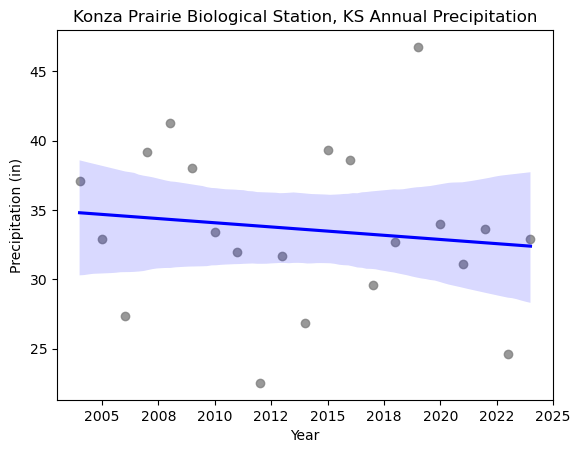

In [7]:
# Plot annual average temperature with a trend line
ax = sns.regplot(
    x=Konza_ann_prcp_df.index.year, 
    y=Konza_ann_prcp_df.PRCP,
    # change color (these two lines of code produced with the help of ChatGPT)
    line_kws={"color": "blue"},
    scatter_kws={"color": "gray"}
)
# Set plot labels
ax.set(
    title='Konza Prairie Biological Station, KS Annual Precipitation',
    xlabel='Year',
    ylabel='Precipitation (in)'
)
# Save the plot as an image (this line of code produced with the help of ChatGPT)
plt.savefig("Konza_precip.png", bbox_inches="tight", dpi=300)

# Get the current axes (the following 2 lines of code produced with the help of Google Gemini)
ax = plt.gca()
# "{x:.0f}" formats the number 'x' as a float with 0 decimal places
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))

# Display the plot without extra text
plt.show()

In [8]:
# Save the climate data
Konza_climate_df.to_csv('Konza_climate_data')

### Vegetation Health Analysis

In [9]:
### set up project and folder for data
project = earthpy.Project("Konza Prarie Vegetation", dirname = 'Konza_ndvi')

In [10]:
# get polygon for area of interest
### search for PRNS
Konza_gdf = ox.geocode_to_gdf(
    'Konza Prairie Biological Station')

### check it out
Konza_gdf

,geometry,bbox_west,bbox_south,bbox_east,bbox_north,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
0,"POLYGON ((-96.61513 39.11099, -96.6151 39.1104...",-96.615135,39.065472,-96.538652,39.135937,304377049,way,104952723,39.100201,-96.576798,boundary,protected_area,25,0.066695,protected_area,Konza Prairie Biological Station,"Konza Prairie Biological Station, Riley County..."


<Axes: >

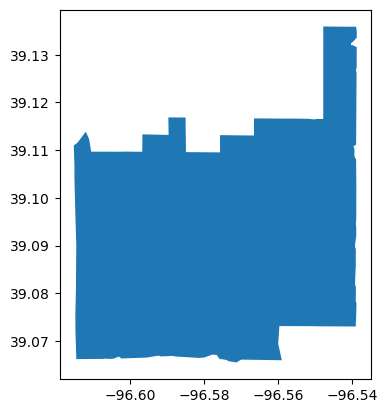

In [11]:
### make a quick plot
Konza_gdf.plot()

In [79]:
# Get NDVI for area of interest
### initialize AppeearsDownloader for MODIS NDVI data
### set parameters
ndvi_downloader = eaapp.AppeearsDownloader(

    ### give your download a name
    download_key = "Konza_ndvi",

    ### tell it to put the data in your project that you already defined
    project = project,

    ### specify the MODIS product you want
    product = 'MOD13Q1.061',
    layer = '_250m_16_days_NDVI',

    ### choose a start date and end date
    start_date = "06-01",
    end_date = "07-30",

    ### recurring means you want those dates over multiple years
    recurring = True,

    ### specify the range of years you want
    year_range = [2004, 2012],

    ### specify the polygon you want to get NDVI data for
    polygon = Konza_gdf
)

In [58]:
ndvi_downloader

In [59]:
### download the prepared download -- this can take a while!
ndvi_downloader.download_files(cache=True)

<generator object Path.rglob at 0x71bddc8a5690>

In [12]:
### get a sorted list of NDVI file paths
ndvi_paths = sorted(list(project.project_dir.rglob('*NDVI*.tif')))

ndvi_paths

[PosixPath('/workspaces/data/konza_ndvi/Konza_ndvi/MOD13Q1.061_2004138_to_2012212/MOD13Q1.061__250m_16_days_NDVI_doy2004145000000_aid0001.tif'),
 PosixPath('/workspaces/data/konza_ndvi/Konza_ndvi/MOD13Q1.061_2004138_to_2012212/MOD13Q1.061__250m_16_days_NDVI_doy2004161000000_aid0001.tif'),
 PosixPath('/workspaces/data/konza_ndvi/Konza_ndvi/MOD13Q1.061_2004138_to_2012212/MOD13Q1.061__250m_16_days_NDVI_doy2004177000000_aid0001.tif'),
 PosixPath('/workspaces/data/konza_ndvi/Konza_ndvi/MOD13Q1.061_2004138_to_2012212/MOD13Q1.061__250m_16_days_NDVI_doy2004193000000_aid0001.tif'),
 PosixPath('/workspaces/data/konza_ndvi/Konza_ndvi/MOD13Q1.061_2004138_to_2012212/MOD13Q1.061__250m_16_days_NDVI_doy2004209000000_aid0001.tif'),
 PosixPath('/workspaces/data/konza_ndvi/Konza_ndvi/MOD13Q1.061_2004138_to_2012212/MOD13Q1.061__250m_16_days_NDVI_doy2005145000000_aid0001.tif'),
 PosixPath('/workspaces/data/konza_ndvi/Konza_ndvi/MOD13Q1.061_2004138_to_2012212/MOD13Q1.061__250m_16_days_NDVI_doy2005161000000_

In [13]:
len(ndvi_paths)

45

In [14]:
doy_start = -25
doy_end = -19

# Loop through each NDVI image
ndvi_das = []
for ndvi_path in ndvi_paths:
    # Get date from file name
    doy = ndvi_path.name[doy_start:doy_end]
    date = pd.to_datetime(doy, format='%Y%j')

    # Open dataset
    da = rxr.open_rasterio(ndvi_path, mask_and_scale=True).squeeze()

    # Add date dimension and clean up metadata
    da = da.assign_coords({'date': date})
    da = da.expand_dims({'date': 1})
    da.name = 'NDVI'

    # Prepare for concatenation
    ndvi_das.append(da)

#len(ndvi_das)
ndvi_das

[<xarray.DataArray 'NDVI' (date: 1, y: 35, x: 38)> Size: 5kB
 array([[[0.53279996, 0.53279996, 0.5589    , ..., 0.7866    ,
          0.69049996, 0.69049996],
         [0.49179998, 0.49179998, 0.6343    , ..., 0.8135    ,
          0.8135    , 0.6964    ],
         [0.5209    , 0.5209    , 0.6299    , ..., 0.7973    ,
          0.7973    , 0.69089997],
         ...,
         [0.8168    , 0.8168    , 0.7854    , ..., 0.7926    ,
          0.7926    , 0.7111    ],
         [0.7191    , 0.7837    , 0.8168    , ..., 0.7926    ,
          0.7926    , 0.70159996],
         [0.6692    , 0.6616    , 0.6012    , ..., 0.7759    ,
          0.7759    , 0.543     ]]], shape=(1, 35, 38), dtype=float32)
 Coordinates:
     band         int64 8B 1
   * x            (x) float64 304B -96.62 -96.61 -96.61 ... -96.54 -96.54 -96.54
   * y            (y) float64 280B 39.14 39.13 39.13 39.13 ... 39.07 39.07 39.07
     spatial_ref  int64 8B 0
   * date         (date) datetime64[ns] 8B 2004-01-14
 Attributes:


In [15]:
# Combine NDVI images from all dates
da = xr.combine_by_coords(ndvi_das, coords=['date'])
da

/tmp/ipykernel_75696/3619952311.py:2: FutureWarning: In a future version of xarray the default value for compat will change from compat='no_conflicts' to compat='override'. This is likely to lead to different results when combining overlapping variables with the same name. To opt in to new defaults and get rid of these warnings now use `set_options(use_new_combine_kwarg_defaults=True) or set compat explicitly.
  da = xr.combine_by_coords(ndvi_das, coords=['date'])
/tmp/ipykernel_75696/3619952311.py:2: FutureWarning: In a future version of xarray the default value for compat will change from compat='no_conflicts' to compat='override'. This is likely to lead to different results when combining overlapping variables with the same name. To opt in to new defaults and get rid of these warnings now use `set_options(use_new_combine_kwarg_defaults=True) or set compat explicitly.
  da = xr.combine_by_coords(ndvi_das, coords=['date'])


<xarray.Dataset> Size: 240kB
Dimensions:      (date: 45, y: 35, x: 38)
Coordinates:
    band         int64 8B 1
  * x            (x) float64 304B -96.62 -96.61 -96.61 ... -96.54 -96.54 -96.54
  * y            (y) float64 280B 39.14 39.13 39.13 39.13 ... 39.07 39.07 39.07
    spatial_ref  int64 8B 0
  * date         (date) datetime64[ns] 360B 2004-01-14 2004-01-16 ... 2012-01-20
Data variables:
    NDVI         (date, y, x) float32 239kB 0.5328 0.5328 ... 0.4218 0.3491

In [16]:
# Calculate the difference in NDVI
ndvi_diff = (
    da.sel(date=slice('2008', '2012'))
    .mean('date')
    .NDVI 
    
    - da.sel(date=slice('2004', '2008'))
    .mean('date')
    .NDVI
)

ndvi_diff

<xarray.DataArray 'NDVI' (y: 35, x: 38)> Size: 5kB
array([[ 0.06009209,  0.06009209,  0.03429198, ...,  0.00743198,
        -0.00204802, -0.00204802],
       [ 0.04198003,  0.04198003,  0.03021204, ...,  0.00706387,
         0.00706387, -0.00228   ],
       [ 0.03881192,  0.02630001,  0.03782398, ..., -0.00181991,
        -0.00181991,  0.01724392],
       ...,
       [ 0.014956  ,  0.014956  ,  0.00109196, ...,  0.001436  ,
         0.001436  ,  0.01158005],
       [ 0.02146399,  0.02022797, -0.00556004, ..., -0.01079619,
        -0.01079619,  0.00913203],
       [ 0.01238   ,  0.01848787,  0.04098397, ..., -0.00173992,
        -0.00173992, -0.00229996]], shape=(35, 38), dtype=float32)
Coordinates:
    band         int64 8B 1
  * x            (x) float64 304B -96.62 -96.61 -96.61 ... -96.54 -96.54 -96.54
  * y            (y) float64 280B 39.14 39.13 39.13 39.13 ... 39.07 39.07 39.07
    spatial_ref  int64 8B 0

In [17]:
# Plot the NDVI difference

Konza_NDVI = (
    ndvi_diff.hvplot(x='x', y='y', cmap='PiYG', 
                 geo=True, title='Change in NDVI at Konza Prairie\n2008-2012 vs. 2004-2008')
*

Konza_gdf.hvplot(
    geo=True, fill_color=None, line_color='grey',
    xlabel='Longitude', ylabel='Latitude'))

Konza_NDVI

:Overlay
   .Image.I    :Image   [x,y]   (NDVI)
   .Polygons.I :Polygons   [Longitude,Latitude]

In [97]:
# Save plot as html
hv.save(Konza_NDVI, 'Konza_NDVI.html')

<Axes: >

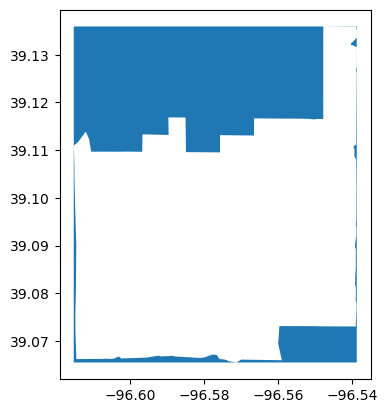

In [18]:
# Compute the area outside the Konza Prairie boundary

outside_Konza_gdf = (
    gpd.GeoDataFrame(geometry=Konza_gdf.envelope)
    .overlay(Konza_gdf, how='difference'))

outside_Konza_gdf.plot()

In [19]:
# Clip NDVI data to both inside and outside the boundary
ndvi_inside = da.rio.clip(Konza_gdf.geometry, from_disk=True)
print(ndvi_inside)

ndvi_outside = da.rio.clip(outside_Konza_gdf.geometry, from_disk=True)
print(ndvi_outside)

<xarray.Dataset> Size: 221kB
Dimensions:      (x: 36, y: 34, date: 45)
Coordinates:
    band         int64 8B 1
  * x            (x) float64 288B -96.61 -96.61 -96.61 ... -96.54 -96.54 -96.54
  * y            (y) float64 272B 39.13 39.13 39.13 39.13 ... 39.07 39.07 39.07
  * date         (date) datetime64[ns] 360B 2004-01-14 2004-01-16 ... 2012-01-20
    spatial_ref  int64 8B 0
Data variables:
    NDVI         (date, y, x) float32 220kB nan nan nan nan ... nan nan nan nan
<xarray.Dataset> Size: 221kB
Dimensions:      (x: 36, y: 34, date: 45)
Coordinates:
    band         int64 8B 1
  * x            (x) float64 288B -96.61 -96.61 -96.61 ... -96.54 -96.54 -96.54
  * y            (y) float64 272B 39.13 39.13 39.13 39.13 ... 39.07 39.07 39.07
  * date         (date) datetime64[ns] 360B 2004-01-14 2004-01-16 ... 2012-01-20
    spatial_ref  int64 8B 0
Data variables:
    NDVI         (date, y, x) float32 220kB 0.4918 0.6343 ... 0.4218 0.4218


In [20]:
# Compute mean annual July NDVI
july_ndvi_inside_df = (ndvi_inside
                       .groupby(ndvi_inside.date.dt.year)
                       .mean(...)
                       .NDVI.to_dataframe())
print('Mean NDVI inside Konza Prairie\n', july_ndvi_inside_df.head())

july_ndvi_outside_df = (ndvi_outside
                       .groupby(ndvi_outside.date.dt.year)
                       .mean(...)
                       .NDVI.to_dataframe())
print('Mean NDVI outside Konza Prairie\n', july_ndvi_outside_df.head())

Mean NDVI inside Konza Prairie
       band  spatial_ref      NDVI
year                             
2004     1            0  0.782115
2005     1            0  0.687610
2006     1            0  0.685558
2007     1            0  0.744759
2008     1            0  0.760001
Mean NDVI outside Konza Prairie
       band  spatial_ref      NDVI
year                             
2004     1            0  0.690666
2005     1            0  0.636587
2006     1            0  0.629236
2007     1            0  0.649652
2008     1            0  0.684952


In [21]:
# Join inside and outside Konza df and rename columns
july_ndvi_df = (july_ndvi_inside_df[['NDVI']]
                .join(july_ndvi_outside_df[['NDVI']], 
                      lsuffix=' Inside Konza Prairie', 
                      rsuffix=' Outside Konza Prairie'))
july_ndvi_df

,NDVI Inside Konza Prairie,NDVI Outside Konza Prairie
year,,
2004,0.782115,0.690666
2005,0.687610,0.636587
2006,0.685558,0.629236
2007,0.744759,0.649652
2008,0.760001,0.684952
2009,0.778717,0.723701
2010,0.777798,0.728336
2011,0.729234,0.681873
2012,0.615042,0.606430


In [22]:
# Plot mean NDVI inside and outside Konza boundary
Konza_NDVI2 = july_ndvi_df.hvplot(title='Mean July NDVI Inside and Outside Konza Prairie')
Konza_NDVI2

:NdOverlay   [Variable]
   :Curve   [year]   (value)

In [95]:
# Save as html
hv.save(Konza_NDVI2, 'Konza_NDVI2.html')

In [23]:
# Calculate difference inside and outside the boundary
july_ndvi_df['Difference'] = (july_ndvi_df['NDVI Inside Konza Prairie'] 
                              - july_ndvi_df['NDVI Outside Konza Prairie'])
july_ndvi_df

,NDVI Inside Konza Prairie,NDVI Outside Konza Prairie,Difference
year,,,
2004,0.782115,0.690666,0.091449
2005,0.687610,0.636587,0.051023
2006,0.685558,0.629236,0.056322
2007,0.744759,0.649652,0.095107
2008,0.760001,0.684952,0.075049
2009,0.778717,0.723701,0.055016
2010,0.777798,0.728336,0.049463
2011,0.729234,0.681873,0.047361
2012,0.615042,0.606430,0.008612


In [24]:
# Plot difference inside and outside the boundary
Konza_NDVI3 = july_ndvi_df.Difference.hvplot(
    title='Difference in NDVI within and outside Konza Prairie')
Konza_NDVI3

:Curve   [year]   (Difference)

In [104]:
# Save as html
hv.save(Konza_NDVI3, 'Konza_NDVI3.html')

## Results
![Precipitation at Konza Prairie Biological Station, KS](Konza_precip0.png)

**Figure 1.** A plot of total precipitation in Konza Prairie from 2004-2012. Based on this plot, precipitation seems to vary quite drastically by year. There was over twice as much precipitation in 2019 than there was in 2012, for example.

![Konza Prairie Biological Station, KS Annual Precipitation](Konza_precip.png)

**Figure 2.** A linear regression model fitted onto a scatterplot for annual precipitation totals in Konza Prairie. This plot demonstrates a slight decrease in annual precipitation over time, though it is difficult to derive a confident trend based on the variability in precipitation per year. Based on this, a slight decrease in vegetation health over time was expected.

<embed type="text/html" src="Konza_NDVI.html" width="600" height="600">

**Figure 3.** An NDVI difference map comparing date ranges of 2004-2008 and 2008-2012. This plot shows a general decrease in vegetation health in Konza Prairie between these two time periods, especially near the east of the study area. Meanwhile, vegetation health increases significantly just outside of the Prairie and especially directly north of the study area, prompting the creation of the following two plots to investigate further.

<embed type="text/html" src="Konza_NDVI2.html" width="600" height="600">

**Figure 4.** An NDVI difference plot comparing the area directly outside of Konza Prairie to the inside of Konza Prairie. Here, it is clear that the inside of Konza Prairie has consistently had higher vegetation health values than the outside of the Prairie, but that these two areas became closer in vegetation health values over time from 2004-2012.

<embed type="text/html" src="Konza_NDVI3.html" width="600" height="600">

**Figure 5.** A plot visualizing the trend in difference in NDVI within and outside Konza Prairie from 2004-2012. This difference was significant in early years of the study period, but became very minimal towards 2012 and the end of the time period studied.

## Discussion
Visualized in Figure 3, there is a stark difference between vegetation health change outside of the prairie, where vegetation had become more healthy during the 2008-2012 date range, and vegetation health change inside of the prairie, where vegetation had generally become less healthy during the 2008-2012 date range, especially near the east of the study site. This is not likely to result from precipitation differences as the spatial difference between the outside and inside of the prairie is too small. Rather, this difference occurs likely because the areas displaying most positive change are primarily irrigated agriculture land wedged in between Manhattan, KS and Konza Prairie Biological Station, just north of the study site.

It is difficult to determine the cause of vegetation health increases from the 2004-2008 date range to the 2008-2012 date range in this agricultural area amongst a simultaneous decline in vegetation health inside the Prairie without further research, but inferences can be made. Using a Google Earth time slider, it is not obvious whether many new agriculture plots were formed within the appropriate time period, but many plots do appear greener in summer 2010 and 2012 satellite imagery vs summer 2007 imagery, for example (Google, n.d.). I would hypothesize, therefore, that some of these plots added irrigation infrastructure or upgraded their irrigation technology during the 2008-2012 date range. Additionally, some farms in this area, such as Britt's Farm and A&H Farm, have greatly expanded agritourism efforts in recent years (Brit's Farm, 2025; A&H Farm, 2025), an industry built upon produce and other agricultural production that may have lead farmers to focus even more on advanced irrigation to prepare their farms aesthetically for new events and tours during this date range. 

Changes in precipitation may best explain the difference trend, despite probable similarity inside and outside the Prairie. Average yearly precipitation decreased from 35.55 inches in the 2004-2008 date range to 33.44 inches in the 2008-2012 date range. Konza Prairie's vegetation productivity is controlled primarily by precipitation amongst a lack of irrigation, so this difference may explain the slight decrease in vegetation health within the Prairie and especially the prominent internal decrease in vegetation health from 2011 to 2012, when yearly precipitation dropped by almost 10 inches (Figure 4). To account for the decrease in precipitation, farmers likely upped their irrigation use during the 2008-2012 period, creating agricultural areas where vegetation health is more controllable and dictated less by precipitation levels. Irrigation advancements likely explain the trend visualized in Figure 5 as well: a general decrease in vegetation health difference within and outside Konza Prairie over time. Konza Prairie Biologial Station exhibited higher vegetation health levels for years, likely due to its protected, natural system and lack of development compared to agricultural areas outside, but this difference has lessened over time with the expanded use of irrigation. With extra time and resources, an analysis extending beyond 2012 and up to the current year could determine whether this trend continues in more recent years and better analyze the likelihood of irrigation as a driver of internal and external NDVI difference change.

Future iterations or expansions of this analysis could also shift from a tallgrass prairie like Konza to an arid or semi-arid landscape like a site within the African Sahel or American Southwest. This would provide a slightly different but perhaps more accurate analysis as yearly precipitation sums are even more of a limiting factor for vegetation growth and productivity in these environments (Zhang et al., 2018). Quantifying prairie precipitation metrics based on variability or intensity instead of using yearly sums could improve the analysis, especially considering that precipitation variability can have a greater impact on entire prairie ecosystems - in one study, experimentally increased intra-annual season rainfall variability into a tallgrass prairie caused most ecosystem processes to decrease by 8–40% (Fay et al., 2011).

### Conclusion
Regardless of limitations, this analysis suggests that both precipitation and vegetation health generally decreased within Konza Prairie Biological Station from 2004-2012, and that change in precipitation was the main driving force of the vegetation health decrease. However, vegetation health increased in the areas just outside of the Prairie boundary during this time period, likely as a result of irrigated agriculture practices.

## References

A&H Farm. (2025). About A&H Farm. Aandhfarm.com. https://www.aandhfarm.com/about

Britt's Farm. (2025). Home. Brittsfarm.com. http://www.brittsfarm.com

Craine, J.M., Nippert, J.B., Towne, E.G. et al. Functional consequences of climate change-induced plant species loss in a tallgrass prairie. Oecologia 165, 1109–1117 (2011). https://doi.org/10.1007/s00442-011-1938-8

Didan, K. (2021). MODIS/Terra Vegetation Indices 16-Day L3 Global 250m SIN Grid V061 [Data set]. NASA Land Processes Distributed Active Archive Center. https://doi.org/10.5067/MODIS/MOD13Q1.061 Date Accessed: 2025-11-26

EPA. (2016). What Climate Change Means for Kansas [Review of What Climate Change Means for Kansas]. In epa.gov. United States Environmental Protection Agency. https://www.epa.gov/sites/default/files/2016-09/documents/climate-change-ks.pdf

Explore Manhattan | Manhattan, KS - Official Website. (2025). Manhattanks.gov. https://www.manhattanks.gov/2277/Explore-Manhattan

Fay, P. A., Blair, J. M., Smith, M. D., Nippert, J. B., Carlisle, J. D., and Knapp, A. K.: Relative effects of precipitation variability and warming on tallgrass prairie ecosystem function, Biogeosciences, 8, 3053–3068, https://doi.org/10.5194/bg-8-3053-2011, 2011.

Google (n.d.). Google Earth Pro (Version 7.3.6) [Software]. https://www.google.com/earth/. 

Konza Prairie Biological Station | Kansas State University. (n.d.). Kpbs.konza.k-State.edu. https://kpbs.konza.k-state.edu/

Matthew J. Menne, Imke Durre, Russell S. Vose, Byron E. Gleason, and Tamara G. Houston, 2012: An Overview of the Global Historical Climatology Network-Daily Database. J. Atmos. Oceanic Technol., 29, 897-910. doi:10.1175/JTECH-D-11-00103.1.

Menne, Matthew J., Imke Durre, Bryant Korzeniewski, Shelley McNeill, Kristy Thomas, Xungang Yin, Steven Anthony, Ron Ray, Russell S. Vose, Byron E.Gleason, and Tamara G. Houston (2012): Global Historical Climatology Network - Daily (GHCN-Daily), Version 3. MANHATTAN 6 SSW, KS US station USW00053974 Precipitation Data. NOAA National Climatic Data Center. doi:10.7289/V5D21VHZ Accessed Dec. 1, 2025.

Normalized Difference Vegetation Index (NDVI) | NASA Earthdata. (2024, September 30). NASA Earthdata. https://www.earthdata.nasa.gov/topics/land-surface/normalized-difference-vegetation-index-ndvi

OpenStreetMap contributors. (2025). Planet dump [Konza Prairie Biological Station]. Retrieved from https://planet.openstreetmap.org.

Riley County | Department of Agriculture. (2025). Ks.gov. https://www.agriculture.ks.gov/kansas-agriculture/kansas-agricultural-statistics/riley-county

Zhang, W., Brandt, M., Tong, X., Tian, Q., and Fensholt, R.: Impacts of the seasonal distribution of rainfall on vegetation productivity across the Sahel, Biogeosciences, 15, 319–330, https://doi.org/10.5194/bg-15-319-2018, 2018.